In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('magicbricks_cleaned_properties.csv')
data

,City,Title,Bedroom,Property Name,Region,Price,Rate per Sqft,Carpet Area,Floor,Transaction Type,Bathroom,Description
0,Mumbai,3 BHK Apartment for Sale in Kanakia Silicon Va...,3.0,Kanakia Silicon Valley,Powai Mumbai,355.00,41375.29,858.000000,NaN,New Property,3,NaN
1,Mumbai,"1 BHK Apartment for Sale in Royal Pristo, Mala...",1.0,Royal Pristo,Malad East Mumbai,245.23,75922.03,323.000000,NaN,New Property,2,NaN
2,Mumbai,"2 BHK Apartment for Sale in Leo Tower, Andheri...",2.0,Leo Tower,Andheri West Mumbai,253.00,39531.25,640.000000,NaN,New Property,2,NaN
3,Mumbai,"2 BHK Apartment for Sale in Sheth Montana, Mul...",2.0,Sheth Montana,Mulund West Mumbai,258.00,28603.10,902.000000,NaN,New Property,3,NaN
4,Mumbai,2 BHK Apartment for Sale in RNA NG Grand Empir...,2.0,RNA NG Grand Empire,Navghar Road Mumbai,111.00,19137.93,580.000000,NaN,New Property,2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
8759,Kolkata,2 BHK Builder Floor for Sale in Bally Kolkata,2.0,NaN,Bally Kolkata,245.23,28681.66,855.000000,3 out of 4,Resale,2,NaN
8760,Kolkata,2 BHK Apartment for Sale in Belghoria Expressw...,2.0,NaN,Belghoria Expressway Kolkata,245.23,18728.02,1309.418791,Ground out of 5,Resale,2,NaN
8761,Kolkata,"2 BHK Apartment for Sale in PRIVATE HOUSE, Bel...",2.0,PRIVATE HOUSE,Belgachia Kolkata,245.23,28850.37,850.000000,3 out of 3,Resale,1,Parking 140 sq ft available
8762,Kolkata,2 BHK Apartment for Sale in Behala Kolkata,2.0,NaN,Behala Kolkata,245.23,22811.92,1075.000000,1 out of 4,Resale,2,Freehold Multistorey Apartment is located at 1...


In [4]:
data.shape

(8764, 12)

In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8764 entries, 0 to 8763
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   City              8764 non-null   object 
 1   Title             8764 non-null   object 
 2   Bedroom           8764 non-null   float64
 3   Property Name     4090 non-null   object 
 4   Region            8764 non-null   object 
 5   Price             8764 non-null   float64
 6   Rate per Sqft     8764 non-null   float64
 7   Carpet Area       8764 non-null   float64
 8   Floor             7209 non-null   object 
 9   Transaction Type  8764 non-null   object 
 10  Bathroom          8764 non-null   object 
 11  Description       5661 non-null   object 
dtypes: float64(4), object(8)
memory usage: 821.8+ KB


In [5]:
data.isna().sum()

City                   0
Title                  0
Bedroom                0
Property Name       4674
Region                 0
Price                  0
Rate per Sqft          0
Carpet Area            0
Floor               1555
Transaction Type       0
Bathroom               0
Description         3103
dtype: int64

In [84]:
data.describe().round(2)

,Bedroom,Price,Rate per Sqft,Carpet Area
count,8764.00,8764.00,8764.00,8764.00
mean,2.74,305.43,30855.82,1391.94
std,1.37,673.81,113617.38,4652.26
min,1.00,100.00,112.50,1.00
25%,2.00,188.00,14915.51,700.00
50%,3.00,245.23,24444.44,1049.50
75%,3.00,250.00,35032.60,1500.25
max,10.00,45000.00,10000000.00,400000.00


In [6]:
data.drop(columns=['Title', 'Property Name', 'Floor','Bathroom', 'Description'], inplace =  True)
print('Shape of data :', data.shape)
df = data.copy()

Shape of data : (8764, 7)


In [7]:
le = LabelEncoder()

In [8]:
for column in data.describe(include='object').columns:
    data[column] = le.fit_transform(data[column])

In [9]:
data.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
City,8764.0,1.43,1.06,0.0,1.00,1.00,2.00,3.0
Bedroom,8764.0,2.74,1.37,1.0,2.00,3.00,3.00,10.0
Region,8764.0,1247.15,692.27,0.0,666.75,1262.00,1808.25,2482.0
Price,8764.0,305.43,673.81,100.0,188.00,245.23,250.00,45000.0
Rate per Sqft,8764.0,30855.82,113617.38,112.5,14915.51,24444.44,35032.60,10000000.0
Carpet Area,8764.0,1391.94,4652.26,1.0,700.00,1049.50,1500.25,400000.0
Transaction Type,8764.0,1.60,0.80,0.0,2.00,2.00,2.00,2.0


In [91]:
data

,City,Bedroom,Region,Price,Rate per Sqft,Carpet Area,Transaction Type
0,2,3.0,1725,355.00,41375.29,858.000000,0
1,2,1.0,1334,245.23,75922.03,323.000000,0
2,2,2.0,122,253.00,39531.25,640.000000,0
3,2,2.0,1435,258.00,28603.10,902.000000,0
4,2,2.0,1523,111.00,19137.93,580.000000,0
...,...,...,...,...,...,...,...
8759,1,2.0,234,245.23,28681.66,855.000000,2
8760,1,2.0,306,245.23,18728.02,1309.418791,2
8761,1,2.0,303,245.23,28850.37,850.000000,2
8762,1,2.0,296,245.23,22811.92,1075.000000,2


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8764 entries, 0 to 8763
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   City              8764 non-null   int64  
 1   Bedroom           8764 non-null   float64
 2   Region            8764 non-null   int64  
 3   Price             8764 non-null   float64
 4   Rate per Sqft     8764 non-null   float64
 5   Carpet Area       8764 non-null   float64
 6   Transaction Type  8764 non-null   int64  
dtypes: float64(4), int64(3)
memory usage: 479.4 KB


In [11]:
for i in data.columns:
    print(i, "Min Value : ", data[i].min(), "Max Value : ", data[i].max())

City Min Value :  0 Max Value :  3
Bedroom Min Value :  1.0 Max Value :  10.0
Region Min Value :  0 Max Value :  2482
Price Min Value :  100.0 Max Value :  45000.0
Rate per Sqft Min Value :  112.5 Max Value :  10000000.0
Carpet Area Min Value :  1.0 Max Value :  400000.0
Transaction Type Min Value :  0 Max Value :  2


In [13]:
data1 = data.copy()  # Make a copy of the original DataFrame
print(data.shape)
data1 = data1[data1['Price'] <= 7500.0]
df = df[df['Price'] <= 7500.0]

# Display the shape of the modified DataFrame
df.rename(columns={
    'City': 'City',
    'Bedroom': 'Bedroom',
    'Region': 'Region',
    'Price': 'Price',
    'Rate per Sqft': 'RateperSqft',  
    'Carpet Area': 'CarpetArea',  
    'Transaction Type': 'TransactionType'  
}, inplace=True)
df['CarpetArea'] = df['CarpetArea'].round(2)
print("DataFrame shape after dropping rows:", data1.shape)
df.to_csv('data.csv', index=False)


(8764, 7)
DataFrame shape after dropping rows: (8758, 7)


In [14]:
for i in data1.columns:
    print(i, "Min Value : ", data1[i].min(), "Max Value : ", data1[i].max())

City Min Value :  0 Max Value :  3
Bedroom Min Value :  1.0 Max Value :  10.0
Region Min Value :  0 Max Value :  2482
Price Min Value :  100.0 Max Value :  7500.0
Rate per Sqft Min Value :  112.5 Max Value :  10000000.0
Carpet Area Min Value :  1.0 Max Value :  400000.0
Transaction Type Min Value :  0 Max Value :  2


In [15]:
data1.head()

,City,Bedroom,Region,Price,Rate per Sqft,Carpet Area,Transaction Type
0,2,3.0,1725,355.00,41375.29,858.0,0
1,2,1.0,1334,245.23,75922.03,323.0,0
2,2,2.0,122,253.00,39531.25,640.0,0
3,2,2.0,1435,258.00,28603.10,902.0,0
4,2,2.0,1523,111.00,19137.93,580.0,0


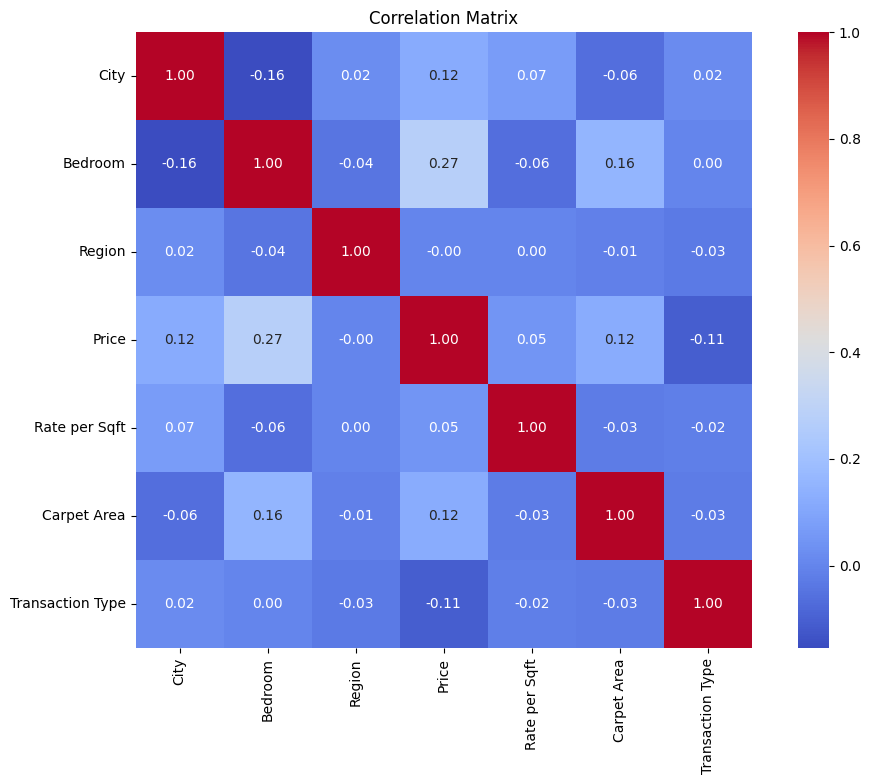

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation matrix
corr_matrix = data1.corr()

# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Correlation Matrix")
plt.show()



In [17]:
X =  data1.drop('Price', axis = 1)
y =  data1['Price']
X.head()

,City,Bedroom,Region,Rate per Sqft,Carpet Area,Transaction Type
0,2,3.0,1725,41375.29,858.0,0
1,2,1.0,1334,75922.03,323.0,0
2,2,2.0,122,39531.25,640.0,0
3,2,2.0,1435,28603.10,902.0,0
4,2,2.0,1523,19137.93,580.0,0


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20, random_state = 12)

In [19]:
print(X_train.shape, X_test.shape)

(7006, 6) (1752, 6)


In [20]:
from sklearn.linear_model import LinearRegression

linear = LinearRegression()
linear.fit(X_train, y_train)

print("Training Accuracy = ", linear.score(X_train, y_train))
print("Test Accuracy     = ", linear.score(X_test, y_test))

Training Accuracy =  0.18287713315630783
Test Accuracy     =  -3.1333339553134696


In [21]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(min_samples_split=2)
dt.fit(X_train, y_train)

print("Training Accuracy = ", dt.score(X_train, y_train))
print("Test Accuracy     = ", dt.score(X_test, y_test))

Training Accuracy =  1.0
Test Accuracy     =  0.8669071458470963


In [22]:
from sklearn.model_selection import cross_val_score

dt = DecisionTreeRegressor(min_samples_split=10, max_depth=5)
cross_val_scores = cross_val_score(dt, X_train, y_train, cv=5)
print("Cross-Validation Scores:", cross_val_scores)
print("Mean Cross-Validation Score:", np.mean(cross_val_scores))


Cross-Validation Scores: [0.78394482 0.8277805  0.79417497 0.8403345  0.83319332]
Mean Cross-Validation Score: 0.8158856225117024


In [23]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 1000, max_depth=5, random_state = 12)
rf.fit(X_train, y_train)

print("Training Accuracy = ", rf.score(X_train, y_train))
print("Test Accuracy     = ", rf.score(X_test, y_test))

Training Accuracy =  0.96474010734832
Test Accuracy     =  0.9128456586797051


In [26]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
poly.fit_transform(X)

# Define the pipeline and train model
poly_model = Pipeline([('poly', PolynomialFeatures(degree=2)),
                       ('rf', RandomForestRegressor(n_estimators = 1000, max_depth=5, random_state = 12))])
poly_model.fit(X_train, y_train)

# Calculate the Score
print("Training Accuracy = ", poly_model.score(X_train, y_train))
print("Test Accuracy     = ", poly_model.score(X_test, y_test))

Training Accuracy =  0.9979185881605502
Test Accuracy     =  0.9804032431818275


In [27]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    accuracy = model.score(test_features, test_labels)

    print('Average Error  = {:0.4f} degrees'.format(np.mean(errors)))
    print('Model Accuracy = {:0.4f} %'.format(accuracy))

In [28]:
evaluate(poly_model, X_train, y_train)

Average Error  = 3.5581 degrees
Model Accuracy = 0.9979 %


In [29]:
evaluate(poly_model, X_test, y_test)

Average Error  = 4.1058 degrees
Model Accuracy = 0.9804 %


In [30]:
pred = poly_model.predict(X_test)

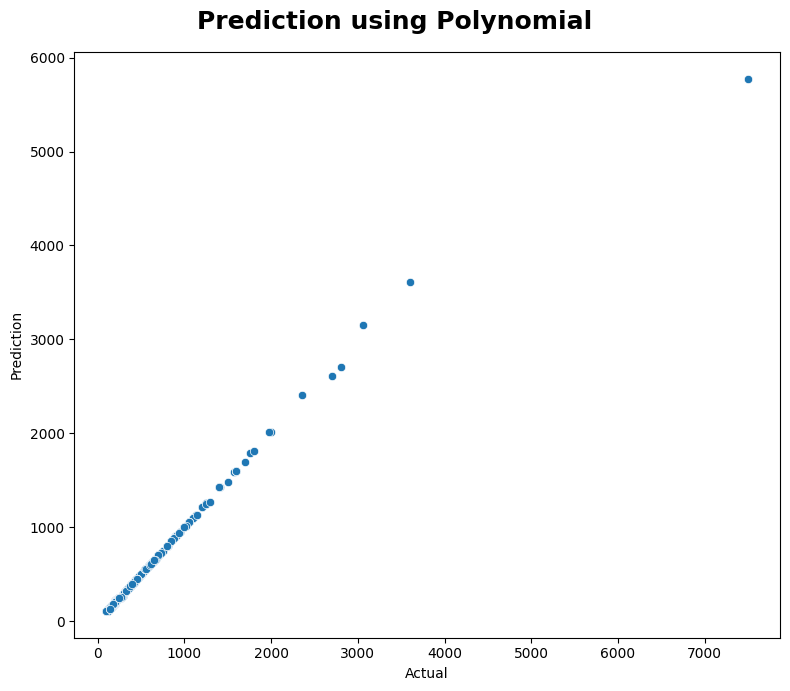

In [31]:
fig = plt.figure(figsize=(8, 7))

# Use keyword arguments for the scatterplot
sns.scatterplot(x=y_test, y=pred)
fig.suptitle('Prediction using Polynomial', fontsize=18, fontweight='bold')
plt.xlabel("Actual")
plt.ylabel("Prediction")

# Update parameters and adjust layout
# pylab.rcParams.update(rcParams)
fig.tight_layout()
fig.subplots_adjust(top=0.92)
plt.show()

In [32]:
from pickle import dump

In [33]:
dump(poly_model,open('regression_model.pkl','wb'))